# Acoustic Feature Extraction

이 챕터에서는 **Mel-Frequency Cepstral Coefficients(MFCC)**를 추출하는 방법을 살펴봅니다. MFCC는 음성 인식과 관련해 불필요한 정보는 버리고 중요한 특질만 남긴 것입니다. MFCC는 [기존 시스템](https://ratsgo.github.io/speechbook/docs/am)은 물론 최근 엔드투엔드(end-to-end) 기반 모델에 이르기까지 음성 인식 시스템에 널리 쓰이는 피처인데요. [뉴럴네트워크 기반 피처 추출](https://ratsgo.github.io/speechbook/docs/neuralfe) 방식과는 달리 음성 도메인의 지식과 공식에 기반한 추출 방법이며 음성 입력이 주어지면 피처가 고정된(deterministic) 형태입니다. 

이 챕터의 핵심은 [MFCCs](https://ratsgo.gihub.io/speechbook/docs/fe/mfcc)인데요. 이 아티클을 읽기 전에 그의 기반 지식이 되는 [푸리에 변환(Fourier Transform)](https://ratsgo.github.io/speechbook/docs/fe/ft) 항목을 먼저 읽어보시기를 권해 드립니다. 푸리에 변환은 시간과 주파수 도메인 관련 함수를 이어주는 수학적인 연산입니다. 음성 신호의 스펙트럼 분석 등에 필수적입니다. 


---

# Fourier Transform

푸리에 변환(Fourier Transform)은 시간과 주파수 도메인 관련 함수를 이어주는 수학적인 연산입니다. 음성 신호의 스펙트럼 분석 등에 필수적입니다. 이 글에서는 컴퓨터 연산에 친화적인 이산 푸리에 변환(Discrete Fourier Transform)을 중심으로 설명하며 직관적인 이해에 중점을 두었습니다.

---

## Discrete Fourier Transform

푸리에 변환(Fourier Transform)이란 시간(time)에 대한 함수(혹은 신호)와 주파수(frequency)에 대한 함수(혹은 신호)를 잇는 수학적인 연산을 가리킵니다. 그림1을 봅시다. 두 개의 단순파(simple wave)가 시간 도메인에서 복합파(complex wave)로 표현되고 있는데요. 여기에 푸리에 변환을 실시하면 주파수 도메인에서 두 개의 주파수 성분으로 분해할 수 있습니다. 반대로 주파수 도메인에 푸리에 변환을 실시하면 시간 도메인에서 복합파를 만들어낼 수 있습니다.


## **그림1** Fourier Transform
<img src="https://i.imgur.com/GrX9rSd.png" width="400px" title="source: imgur.com" />


음성 인식에서는 일반적으로 이산 푸리에 변환(Discrete Fourier Transform)이 쓰입니다. 컴퓨터는 이산 신호를 처리하는 데 적합하기 때문인데요. 이산 푸리에 변환은 특정 도메인(예컨대 시간)의 이산 신호(discrete signal)를 다른 도메인(예컨대 주파수)의 이산 신호로 변환하는 과정입니다. 여기에서 이산이란 연속(continuous)과 반대되는 말로써 신호의 값이 연속적이지 않고 띄엄띄엄 있어서 이것들을 제외한 시간이나 주파수에서는 값이 0인 것을 뜻합니다. 이 글에서는 이산 푸리에 변환을 중심으로 살펴보겠습니다.

이산 푸리에 변환을 식으로 정의한 것은 수식1과 같습니다. 이산 푸리에 변환을 실시한 뒤 이를 다시 원래 도메인으로 변환하는 과정을 역푸리에 변환(Inverse Fourier Transform)이라고 합니다. 이를 이산 신호에 대해 실시한 것이 이산 역푸리에 변환(Inverse Discrete Fourier Transform)이라고 하는데요. 수식2와 같습니다. 자세히 보면 $\exp$의 지수 파트에 음수가 붙어있느냐 아니냐에 따라 푸리에 변환과 역푸리에 변환 사이의 차이가 있음을 확인할 수 있습니다.

## **수식1** Discrete Fourier Transform (1)


$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}$$


## **수식2** Inverse Discrete Fourier Transform

$$x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i~2\pi~k~n~/~N}$$


---

In [20]:
import numpy as np

y = np.exp(1j*np.pi) 
print (y)

print(np.exp(1))
print(np.pi)
print(1j**2)

(-1+1.2246467991473532e-16j)
2.718281828459045
3.141592653589793
(-1+0j)


In [21]:
import numpy as np

y = np.exp(1j*(np.pi/2)) 
print (y)

(6.123233995736766e-17+1j)


In [23]:
import numpy as np

y1 = np.cos(np.pi/6) + np.sin(np.pi/6)*1j
print(y1)
y2 = np.exp(1j*(np.pi/6)) 
print (y2)

(0.8660254037844387+0.49999999999999994j)
(0.8660254037844387+0.49999999999999994j)


In [24]:
import numpy as np

y1 = np.cos(np.pi/4) + np.sin(np.pi/4)*1j
print(y1)
y2 = np.exp(1j*(np.pi/4)) 
print (y2)

(0.7071067811865476+0.7071067811865475j)
(0.7071067811865476+0.7071067811865475j)


## Concepts

푸리에 변환을 직관적으로 이해하려면 [오일러 공식(Euler's formula)](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%9D%BC%EB%9F%AC_%EA%B3%B5%EC%8B%9D)부터 살펴야 합니다. 오일러 공식은 수학자 레온하르트 오일러의 이름이 붙은 공식으로, 삼각함수와 지수함수에 대한 관계를 나타냅니다. 수식3과 같습니다($i$는 허수로, 제곱하여 -1이 되는 수). 수식3의 $\theta$에 $\pi$를 대입하면 $\exp{(i\pi)}+1=0$이라는 오일러의 등식을 구할 수 있습니다.

## **수식3** Euler's formula
$$\exp{\left(i\theta\right)} = \cos{\theta} + i\sin{\theta}$$

https://www.numerics.info/

$\exp{(i\theta)}$는 복소 평면상 반지름이 1인 단위원에 대응합니다. 이는 오일러 공식에 의해 실수 파트(real unit, 코사인에 대응)와 허수 파트(imaginary unit, 사인에 대응)의 합으로 표현할 수 있습니다. 그림1과 같습니다(그림1에서는 수식3의 $\theta$를 $\varphi$로 적음). 


## **그림1** Euler's formula
<img src="https://i.imgur.com/iVBkQVd.png" width="250px" title="source: imgur.com" />


복소 지수 함수(cis)는 오일러 공식으로부터 바로 유도할 수 있습니다. 이 복소 지수 함수는 푸리에 변환의 시작점이 됩니다. 수식4와 같으며 시각화한 그림은 그림2와 같습니다. 그림1에서 각각 노란색, 파란색 주기함수에 대응합니다. 


## **수식4** 복소 지수 함수

$$cis(\theta)=\exp{\left(i\theta\right)} = \cos{\theta} + i\sin{\theta}$$



## **그림2** 복소 지수 함수
<img src="https://i.imgur.com/DB6KMIE.gif" width="400px" title="source: imgur.com" />


그림3은 푸리에 변환을 개념적으로 나타낸 것입니다. 그림2, 그림3을 직관적으로 이해해보기 위해 수식1을 그대로 다시 가져왔습니다. 시간에서 주파수 도메인으로 푸리에 변환을 실시한다고 했을 때 $x_n$은 시간 도메인의 $n$번째 샘플, $X_k$는 주파수 도메인의 $k$번째 푸리에 변환 결과물입니다. 

수식1의 첫번째 줄에서 $k/N$은 복소평면상 단위원에서 얼마나 빠른 속도로 회전하는지 나타내는 각 속도(angular velocity)를 가리킵니다. $n$는 시간 인덱스(time index)를 가리키는데요. 시간 인덱스가 1 증가한다고 할 때 각 속도 값이 클 수록 그림2의 녹색 실선에 해당하는 움직임이 커지게 됩니다. (단 $i$, $2\pi$는 상수이기 때문에 복소평면 단위원상 속도에 영향을 미치지 않음) 

한편 수식1 두번째 줄을 보면 푸리에 변환 결과는 복소수(complex number)로, 코사인 함수와 관계 있는 실수부(real part)와 사인 함수와 관계 있는 허수부(imeginary part)로 구성돼 있는 걸 확인할 수 있습니다.


## **수식1** Discrete Fourier Transform (1)

$$
\begin{align*}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
&=\sum _{ n=0 }^{ N-1 } x_{ n }\cdot \left[ \cos { \left( \frac { 2\pi  }{ N } kn \right) -i\cdot \sin { \left( \frac { 2\pi  }{ N } kn \right)  }  }  \right]
\end{align*}
$$

이제 거의 다 왔습니다. 수식1 이산 푸리에 변환 식을 보면 $\exp$ 앞에 시간 도메인의 원래 시그널 $x_n$이 곱해지는 걸 볼 수 있습니다. 지수를 포함한 $\exp$ 항은 복소평면 단위원 위에서 이뤄지는 운동을 의미하는데요. 단위원의 반지름은 1이므로 수식1의 시그마 안에 있는 점들의 복소평면상 좌표값은 $x_n$에 의존적일 겁니다. 

복소평면상 이들 점들을 모두 더하는 것이 이산 푸리에 변환을 적용한 $X_k$가 될텐데요. 이는 주파수(frequency)가 $k/N$일 때 시간 도메인의 원래 신호의 무게 중심이라고 볼 수 있겠습니다. 따라서 $X_k$는 시간 도메인 원래 신호에서 $k/N$에 해당하는 주파수 성분이라고 볼 수 있다는 것이죠. 


## **그림3** Fourier Transform 개념도

<img src="https://i.imgur.com/h1vOlAx.png" width="500px" title="source: imgur.com" />



https://youtu.be/Mc9PHZ3H36M

---

## DFT Matrix

이산 푸리에 변환을 matrix form으로 다시 쓰면 수식3과 같습니다. 여기에서 벡터 $x$는 시간 도메인의 원래 신호, 행렬 $W$는 수식1 $\exp$ 항에 대응합니다. $W$는 $N \times N$ 크기로 행 인덱스는 $k$, 열 인덱스는 $n$입니다. 그림2에서 확인할 수 있듯 $W$의 각 행은 복소평면상 단위원에서 도는 각기 다른 각 속도를 나타냅니다. 요컨대 이산 푸리에 변환의 본질은 선형 변환(linear transform)이라는 것이죠.


## **수식3** Discrete Fourier Transform (2)

$$
\begin{align*}
\vec{X} &= W \cdot \vec{x} 
\\ W_{kn} &= e^{-i~2\pi~k~n~/~N}
\end{align*}
$$


## **그림2** Fourier Transform
<img src="https://i.imgur.com/HBeaeDU.png" width="500px" title="source: imgur.com" />


행렬 $W$를 DFT 행렬(Discrete Fourier Transform Matrix)이라고도 합니다. 그 정의는 수식4와 같습니다. 단 $\omega = \exp{(-2\pi i/N)}$. 수식5는 시간 도메인의 원래 음성 신호가 8개일 때 이산 푸리에 변환을 수행하기 위한 DFT 행렬을 나타냅니다. 수식5에서도 알 수 있듯 DFT 행렬은 [켤레 전치](https://ko.wikipedia.org/wiki/%EC%BC%A4%EB%A0%88_%EC%A0%84%EC%B9%98)가 역행렬(inverse matrix)와 같은 복소수 행렬, 즉 유니타리 행렬(unitary matrix)입니다. 


## **수식4** DFT matrix
<img src="https://i.imgur.com/m7TUD8U.png" width="400px" title="source: imgur.com" />

## **수식5** Eight-point example
<img src="https://i.imgur.com/uAPTio0.png" title="source: imgur.com" />


---

## Python Implementation

코드1은 수식3의 파이썬 구현입니다. 코드2를 실행하면 `numpy`에서 제공하는 `np.fft.fft` 함수와 동일한 결과를 출력하는 걸 확인할 수 있습니다.

## **코드1** Discrete Fourier Transform

In [31]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
N = x.shape[0]
print(N)
n = np.arange(N)
print(n)
k = n.reshape((N, 1))
print(k)
print(k*n)  # (8,1)*(8,) => (8,8)*(8,8) => (8,8)

# ω=exp(−2πi/N)
w = np.exp(-2*np.pi*1j/N) 
print(w)
W = np.exp(-2j * np.pi * k * n / N)
print(W)

8
[0 1 2 3 4 5 6 7]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]
(0.7071067811865476-0.7071067811865475j)
[[ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  7.07106781e-01-7.07106781e-01j
   6.12323400e-17-1.00000000e+00j -7.07106781e-01-7.07106781e-01j
  -1.00000000e+00-1.22464680e-16j -7.07106781e-01+7.07106781e-01j
  -1.83697020e-16+1.00000000e+00j  7.07106781e-01+7.07106781e-01j]
 [ 1.00000000e+00+0.00000000e+00j  6.12323400e-17-1.00000000e+00j
  -1.00000000e+00-1.22464680e-16j -1.83697020e-16+1.00000000e+00j
   1.00000000e+00+2

In [32]:
import numpy as np
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return np.dot(W, x)

## **코드2** numpy 패키지와의 비교

In [33]:
x = np.random.random(1024)
np.allclose(DFT(x), np.fft.fft(x))

True

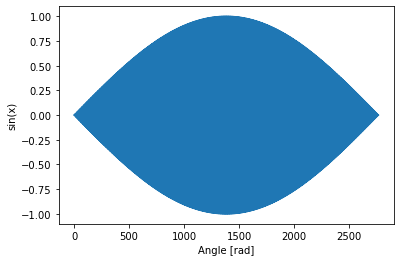

In [34]:
import matplotlib.pylab as plt
x = np.linspace(0, 2*np.pi*440, 880)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

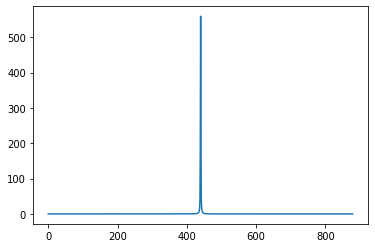

In [37]:
y = DFT(np.sin(x))
plt.plot(np.abs(y))
plt.show()

고속 푸리에 변환(Fast Fourier Transform)은 기존 푸리에 변환에서 중복된 계산량을 줄이는 기법입니다. 이산 코사인 변환(Discrete Cosine Transform)은 이산 푸리에 변환과 유사하나 복소수 파트를 날리고 실수 파트만을 사용해 효율성을 높였습니다.




## References

- [Understanding the FFT Algorithm](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft)
- [위키백과 - DFT matrix](https://en.wikipedia.org/wiki/DFT_matrix)
- [위키백과 - Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
- [이산 푸리에 변환](https://m.blog.naver.com/PostView.nhn?blogId=spacebug&logNo=220649543743&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

---